In [3]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

In [4]:
dataset = read_csv('../datasets/mnist_data/train.csv')
dataset = dataset.values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [6]:
X_train, X_test = X_train/255, X_test/255

### Keras Sequential API on MNIST

In [45]:
model = Sequential()

model.add(Dense(256, input_shape=(784, )))
model.add(Activation('sigmoid'))

model.add(Dense(64))
model.add(Activation('sigmoid'))
# model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
activation_17 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Initialize weights
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [22]:
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [47]:
hist = model.fit(X_train, y_train_one_hot,
          shuffle=True,
          epochs=50,
          batch_size=128,
          validation_data=(X_test, y_test_one_hot)
         )

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 1s 40us/step - loss: 0.6748 - acc: 0.8424 - val_loss: 0.3874 - val_acc: 0.9025
Epoch 2/50
33600/33600 [==============================] - 1s 40us/step - loss: 0.3354 - acc: 0.9117 - val_loss: 0.3068 - val_acc: 0.9154
Epoch 3/50
33600/33600 [==============================] - 2s 51us/step - loss: 0.2790 - acc: 0.9237 - val_loss: 0.2716 - val_acc: 0.9227
Epoch 4/50
33600/33600 [==============================] - 2s 52us/step - loss: 0.2492 - acc: 0.9296 - val_loss: 0.2466 - val_acc: 0.9330
Epoch 5/50
33600/33600 [==============================] - 2s 49us/step - loss: 0.2290 - acc: 0.9343 - val_loss: 0.2310 - val_acc: 0.9369
Epoch 6/50
33600/33600 [==============================] - 2s 46us/step - loss: 0.2136 - acc: 0.9393 - val_loss: 0.2215 - val_acc: 0.9370
Epoch 7/50
33600/33600 [==============================] - 2s 50us/step - loss: 0.2013 - acc: 0.9425 - val_loss: 0.2106 - val_acc:

In [43]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

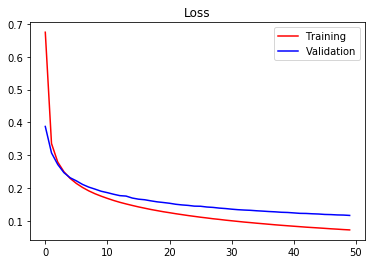

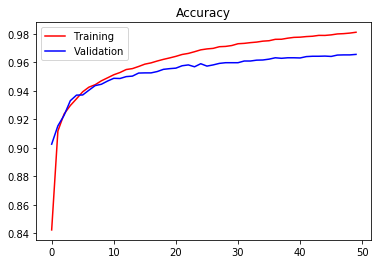

In [48]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Validation')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Validation')
plt.legend()
plt.show()